In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.signal import medfilt
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter

import os
import glob
import csv
# from colour import Color

In [ ]:
# #import ipywidgets as widgets
# #%matplotlib widget

# # import matplotlib.backends.backend_pdf                  as be_pdf
# # from scipy.optimize       import curve_fit              as c_fit
# from scipy                import ndimage                as nd
# from scipy.ndimage        import center_of_mass         as C_O_M
# #from mpl_interactions     import ipyplot                as iplt
# from mpl_toolkits.mplot3d import Axes3D
# from os.path              import isfile, join, isdir
# from os import listdir
# #import copy,scipy,mpld3,astropy,cmath,math,os,json,yapf.yapflib.yapf_api,shutil,h5py,time,gekko
# from numpy.linalg         import norm
# #from mpl_interactions     import hyperslicer
# from datetime             import datetime

# import matplotlib.backends.backend_pdf                  as be_pdf
# # from skimage              import measure                as skm
# from scipy.optimize       import curve_fit              as c_fit
# from scipy                import ndimage                as nd
# from scipy.ndimage        import center_of_mass         as C_O_M
# #from mpl_interactions     import ipyplot                as iplt
# from mpl_toolkits.mplot3d import Axes3D
# from os.path              import isfile, join, isdir
# from os import listdir
# #import seaborn as sns
# from scipy.fftpack import fftn, ifftn, fftshift
# #sns.set_theme()

In [2]:
plt.rcParams.update(plt.rcParamsDefault)

plt.rcParams.update(
    {
        "figure.figsize": (10, 5),
        # "figure.facecolor":"w",
        # 'text.usetex': True,
        'figure.autolayout': True,
        # 'figure.dpi': 150
        # "font.size": 10,
        "axes.grid": True,
        # "lines.markersize": 10,
        # "lines.linewidth": 2,
    }
)

# Load Raw Data, Take a Look

In [ ]:
#datadir =r'C:\Users\solene.da-ville\Documents\FemtoTools\Solène\Data\2024-02-05 Nanotrip ZrO2 pil´lar\CT_C_2024-02-05,09h44m28s\data'
# datadir =r'/home/anastasiia/DATA/FemtoTools/txt/0001Zn'
# datadir =r'/home/anastasiia/DATA/FemtoTools/txt/10-10'
# datadir =r'/home/anastasiia/DATA/FemtoTools/txt/11-20'
datadir =r'/home/anastasiia/DATA/FemtoTools/txt'
# datadir =r'/home/nbeka/M2internship/DATA/FemtoTools/0001Zn'
# datadir =r'/home/nbeka/M2internship/DATA/FemtoTools/10-10'
# datadir =r'/home/nbeka/M2internship/DATA/FemtoTools/11-20'
# datadir =r'/home/nbeka/M2internship/DATA/FemtoTools/0001O'

sample = '0001O'

os.chdir(f'{datadir}/{sample}')
os.getcwd()
lst=glob.glob("*.txt")
print(lst)

/mnt/c/Users/a.walrave/Documents/M2 Internship & PhD/DATA/FemtoTools/CT_C_0001Zn_2025-02-26,10h43m44s/Data_2025-02-26,18h53m52s
['2025-02-26_12-52-37_0_0.txt', '2025-02-26_13-15-38_1_0.txt', '2025-02-26_13-17-25_2_0.txt', '2025-02-26_13-19-39_3_0.txt', '2025-02-26_13-22-16_4_0.txt', '2025-02-26_13-25-41_5_0.txt', '2025-02-26_13-40-19_6_0.txt', '2025-02-26_13-42-25_7_0.txt', '2025-02-26_13-43-51_8_0_Aborted.txt', '2025-02-26_14-01-05_9_0.txt', '2025-02-26_14-04-56_10_0.txt', '2025-02-26_14-05-46_11_0.txt', '2025-02-26_14-19-45_12_0.txt', '2025-02-26_14-20-37_13_0.txt', '2025-02-26_14-21-08_14_0_Aborted.txt', '2025-02-26_14-35-41_15_0.txt', '2025-02-26_14-37-00_16_0_Aborted.txt', '2025-02-26_14-43-13_17_0.txt', '2025-02-26_14-44-16_18_0.txt', '2025-02-26_14-46-03_19_0.txt', '2025-02-26_14-46-49_20_0_Aborted.txt', '2025-02-26_15-11-38_21_0.txt', '2025-02-26_15-12-34_22_0.txt', '2025-02-26_15-13-28_23_0_Aborted.txt', '2025-02-26_15-33-01_24_0.txt', '2025-02-26_15-34-57_25_0.txt', '2025-02-

In [129]:
# Pick the sample
pillar_msmts = pd.read_csv(f'{datadir}/pillar_msmts.csv', sep=';', encoding='unicode_escape')
pillar_msmts.columns = ['Sample', 'Pillar', 'Pillar type', 'datafiles', 'h, um', 'dh, um',
       'd top, um', 'dd top, um', 'd bottom, um', 'dd bottom, um',
       'Taper angle theta, deg', 'Unnamed: 11']
pillar_msmts

,Sample,Pillar,Pillar type,datafiles,"h, um","dh, um","d top, um","dd top, um","d bottom, um","dd bottom, um","Taper angle theta, deg",Unnamed: 11
0,0001Zn,P1,meca,"2024-03-26_14-33-36_12_0.txt, 2024-03-26_14-39...",2.613543,0.276646,0.630250,0.0490,1.05880,0.0065,4.686992,NaN
1,0001Zn,P2,meca,2024-03-26_17-27-25_31_0.txt,1.772818,0.069162,0.617000,0.0380,1.00625,0.0020,6.265003,NaN
2,0001Zn,P3,meca,2024-03-26_18-06-30_34_0.txt,1.863426,0.092004,0.616750,0.0395,1.01300,0.0100,6.069056,NaN
3,0001Zn,P4,MET,2024-03-27_10-12-02_39_0.txt,1.916471,0.090735,0.597500,0.0435,1.12600,0.0000,7.850647,NaN
4,0001Zn,P5,MET,"2024-03-27_10-37-34_41_0_Aborted.txt, 2024-03-...",1.759621,0.122460,0.582333,0.0515,1.09900,0.0000,8.352040,NaN
5,10-10,P1,meca,"2024-03-27_13-53-30_1_0_Aborted.txt, 2024-03-2...",1.804544,0.090735,0.551500,0.0185,0.99700,0.0055,7.036903,NaN
6,10-10,P2,MET,2024-03-27_17-28-42_21_0_Aborted.txt,1.670028,0.145937,0.571000,0.0590,1.07900,0.0010,8.648025,NaN
7,10-10,P3,MET,"2024-03-27_16-51-17_17_0_Aborted.txt, 2024-03-...",1.920532,0.077410,0.600000,0.0410,1.09800,0.0020,7.387279,NaN
8,10-10,P4,meca,2024-03-27_15-27-31_10_0_Aborted.txt,1.719520,0.081217,0.474500,0.0315,0.93600,0.0040,7.643115,NaN
9,10-10,P5,meca,2024-03-27_15-51-09_12_0_Aborted.txt,1.937791,0.039340,0.626000,0.0310,1.06450,0.0045,6.455239,NaN


In [171]:
# Pick the test
sample = '0001O'   # 0001Zn, 10-10, 11-20, 0001O
pillar = 'P4'
pillar_choice = (pillar_msmts['Sample'] == sample) & (pillar_msmts['Pillar'] == pillar)
tests = pillar_msmts.loc[pillar_choice, 'datafiles'].item().split(', ')
print(f'Compression tests for sample {sample}, pillar {pillar}: \n{tests}')

Compression tests for sample 0001O, pillar P4: 
['2024-03-28_14-51-51_2_0_Aborted.txt', '2024-03-28_14-57-27_3_0_Aborted.txt', '2024-03-28_15-03-33_4_0_Aborted.txt', '2024-03-28_15-09-18_5_0_Aborted.txt', '2024-03-28_15-16-08_6_0_Aborted.txt', '2024-03-28_15-23-08_7_0_Aborted.txt', '2024-03-28_15-33-12_8_0_Aborted.txt', '2024-03-28_15-40-22_9_0_Aborted.txt', '2024-03-28_15-49-18_10_0_Aborted.txt', '2024-03-28_15-57-58_11_0_Aborted.txt', '2024-03-28_16-12-07_12_0_Aborted.txt']


In [172]:
# Load datafile(s)
name = tests[0]
lstnom=["Index","Phase","Displacement","Time","PosX","PosY","PosZ","RotA","RotB","PiezoX","ForceA","ForceB","Gripper","VoltageA","VoltageB","Temperature","SampleDisplacement"]
data = pd.read_csv(name, skiprows=3, sep='\t', 
                   usecols=['Phase', 'Displacement', 'Time', 'PosX', 'PiezoX', 'ForceA', 'Temperature', 'SampleDisplacement'],
                   encoding='unicode_escape', names=lstnom, low_memory=False)

In [162]:
data.head()

,Phase,Displacement,Time,PosX,PiezoX,ForceA,Temperature,SampleDisplacement
0,[#],[um],[s],[um],[um],[uN],[°C],[um]
1,1.000000,0.003352,7985.903000,24322.871000,-9.017982E-5,-0.001522,30.012511,-0.355126
2,1.000000,0.003636,7985.905000,24322.871000,0.000194,0.105955,30.012651,-0.354842
3,1.000000,0.003776,7985.907000,24322.871000,0.000334,0.071841,30.012561,-0.354702
4,1.000000,0.003577,7985.909000,24322.871000,0.000134,0.114989,30.012501,-0.354902


In [ ]:
# data.tail()

In [ ]:
# # check col content: ['Displacement', 'SampleDisplacement', 'PosX', 'PiezoX']
# plt.figure()
# force = data.loc[1:, 'ForceA'].to_numpy(dtype=float)
# for col in ['Displacement', 'SampleDisplacement', 'PiezoX']:
#     x = data.loc[1:, col].to_numpy(dtype=float)
#     plt.plot(x, force, label=col)
# plt.legend()
# plt.show()

In [ ]:
# # check 'Phase' argument
# data['Phase'].unique()

In [ ]:
# phase = data['Phase'] == '3.000000'
# plt.figure()
# for phase in ['1.000000', '3.000000', '4.000000']:
#     cond = data['Phase'] == phase
#     force = data.loc[cond, 'ForceA'].to_numpy(dtype=float)
#     x = data.loc[cond, 'SampleDisplacement'].to_numpy(dtype=float)
#     plt.plot(x, force, label=phase)
# #plt.xlim([-0.005, 0.005])
# plt.legend()
# plt.show()

# Data Treatment

In [173]:
# Pillar dimensions
h = pillar_msmts.loc[pillar_choice, 'h, um'].item()
dtop = pillar_msmts.loc[pillar_choice, 'd top, um'].item()
dbott = pillar_msmts.loc[pillar_choice, 'd bottom, um'].item()
rtop = dtop / 2
rbott = dbott / 2
print(h, dtop, dbott)

2.0037798 0.5995 1.056


In [134]:
# def find_curve_start(x, y):    # to improve based on force
# #     noise = x[(-0.3 < x) & (x < -0.1)].std()
#     idx = x[x >= 0].index[0]
#     print(idx, x[idx])
#     print(x[x > x[idx]])
    
# find_curve_start(data['SampleDisplacement'], data['ForceA'])

In [174]:
# Stripping off useless data
data = data.loc[1:, ['Phase', 'ForceA', 'SampleDisplacement']].astype(float)
data = data[data['SampleDisplacement'] >= 0]
data.reset_index(inplace=True)

# calculating true displacement
Frame_stiffness = 22000 #N/m
data['trueD'] = data['SampleDisplacement'] - data['ForceA'] / Frame_stiffness

# Strain, unitless
data['Strain'] = data['trueD'] / h

# Stress, MPa
data['Stress'] = data['ForceA'] / (1/2 * np.pi * (rtop**2 + rbott**2))   # 1e-6 N / 1e-12 m = 1e6 Pa
# data['Stress'] = savgol_filter(data['StressRaw'], 1000, 5)

In [ ]:
# # Noise
# # data['SampleDisplacementSmooth'] = savgol_filter(data['SampleDisplacement'], 1000, 5)
# # df = data[data['SampleDisplacementSmooth'] >= 0]
# data['StrainSmooth'] = savgol_filter(data['Strain'], 1000, 5)
# data = data[data['SampleDisplacement'] >= 0]
# data['StressSmooth'] = savgol_filter(data['Stress'], 1000, 5)

# plt.figure()
# for phase in data['Phase'].unique():
#     cond = data['Phase'] == phase
#     plt.scatter(data.loc[cond, 'Strain'], data.loc[cond, 'Stress'], s=0.1, alpha=0.5, label=f'Phase {phase}')
#     plt.scatter(data.loc[cond, 'StrainSmooth'], data.loc[cond, 'StressSmooth'], s=0.1, alpha=0.5, label=f'Smooth {phase}')
# plt.xlabel('Strain')
# plt.ylabel('Stress (MPa)')
# plt.xlim([-0.03, 0.03])
# plt.ylim([-1, 3])
# # plt.legend()
# plt.show()

In [ ]:
# Sticking together incremental tests - uncomment if necessary - NOT READY


In [175]:
# Linear fit: returns x, y fitted vectors, slope value and x_int (intersection with x-axis)
def lin_fit(x, y):
    x0, x1 = x.values[0], x.values[-1]
    p1, p0 = np.polyfit(x, y, deg=1)
    x_fitted = np.linspace(x0, x1, 10)
    y_fitted = p0 + p1 * x_fitted
    x_int = -p0 / p1
    return x_fitted, y_fitted, p1, x_int

In [176]:
# Young's module at withdrawal (wd)
fmax = data.loc[data['Phase'] == 4, 'ForceA'].max()
to_fit = (data['Phase'] == 4) & (0.4*fmax < data['ForceA']) & (data['ForceA'] < 0.9*fmax)
# E, E0 = np.polyfit(data.loc[to_fit_lin, 'Strain'], data.loc[to_fit_lin, 'Stress'], deg=1)
# lin_fit = E0 + E*data.loc[to_fit_lin, 'Strain']
epsilon_wd, sigma_wd, E, eps_fin = lin_fit(data.loc[to_fit, 'Strain'], data.loc[to_fit, 'Stress'])

print(f'Max force at withdrawal: {fmax} uN')
# print('Linear fit coefs:', E0, E)
print(f"Young's module: {round(E)} MPa")
print(f"Max plastic deformation, eps_fin: {eps_fin}")

Max force at withdrawal: 244.528736 uN
Young's module: 53890 MPa
Max plastic deformation, eps_fin: 0.00789990136362567


In [12]:
# # Curve start polyfit
# to_fit_start = (data['Phase'] == 1) & (0.08*fmax < data['ForceA']) & (data['ForceA'] < 0.1*fmax)
# p3, p2, p1, p0 = np.polyfit(data.loc[to_fit_start, 'Strain'], data.loc[to_fit_start, 'Stress'], deg=3)
# x = data.loc[to_fit_start, 'Strain']
# start_fit = p0 + p1 * x + p2 * x**2 + p3 * x**3
# p3, p2, p1, p0

In [186]:
# Young's module at compression (ct) + epsilon_zero
to_fit = (data['Phase'] == 1) & (0.4*fmax < data['ForceA']) & (data['ForceA'] < 0.9*fmax)
epsilon_ct, sigma_ct, E_ct, eps0 = lin_fit(data.loc[to_fit, 'Strain'], data.loc[to_fit, 'Stress'])

print(f"Strain linear interpolation at the start, eps0: {eps0}")

Strain linear interpolation at the start, eps0: 0.00541834521490814


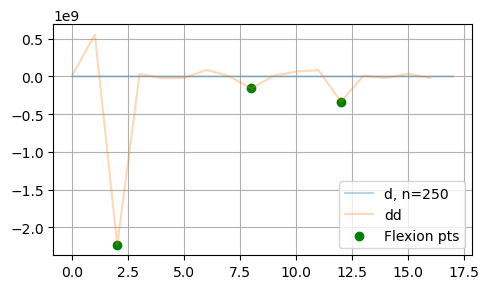

Yield strength: 0.006648255525443576, 273.33119208039807 MPa
Total plastic deformation: 0.0024815561487175307


In [191]:
# Yield Strength
def derive(x, y):
    return np.diff(y) / np.diff(x)

# ISSUE WITH INDICES ON RETURN
def find_flexure_points(epsilon, sigma, sampling_freq, E):
    """Calculate the slope between consecutive data points and identify regions 
    where the slope remains relatively constant (indicating a linear trend). 
    You can then set thresholds for what constitutes a "relatively constant" slope."""
    smooth = gaussian_filter(sigma, 1)
    
    d = derive(epsilon[::sampling_freq], smooth[::sampling_freq])
    dd = derive(epsilon[::sampling_freq][:-1], d)
    threshold = E * 1000    # 40000/5000 for 0001, 1000 for 11-20, 10000/ for 0001O
#     change_indices = np.where(np.abs(np.diff(dd)) > threshold)[0]
    change_indices = np.where(dd < -threshold)[0]
    
#     print(epsilon)
#     print(sigma.index)
#     print(change_indices)

    plt.figure(figsize=(5, 3))
    plt.plot(d, alpha=0.3, label=f"d, n={sampling_freq}")
    plt.plot(dd,  alpha=0.3, label="dd")
    plt.scatter(change_indices, dd[change_indices], c='g', label='Flexion pts')
    plt.legend()
#     plt.ylim([-1e9, 1e9])
#     plt.xlim([0, 50])
    plt.show()

    return change_indices * sampling_freq + epsilon.index[0]

to_search = (data['Phase'] == 1) & (0.4*fmax < data['ForceA']) & (data['ForceA'] < 1.1*fmax)
flex_pts = find_flexure_points(data.loc[to_search, 'Strain'], data.loc[to_search, 'Stress'], 250, E)
sigma_y_id = flex_pts[1]                # choose yield point here
sigma_y = data.loc[sigma_y_id, 'Stress']
eps_y = data.loc[sigma_y_id, 'Strain']
eps_el = eps_y - eps0
eps_pl = eps_fin - eps0
print(f'Yield strength: {eps_el}, {sigma_y} MPa')
print(f'Total plastic deformation: {eps_pl}')

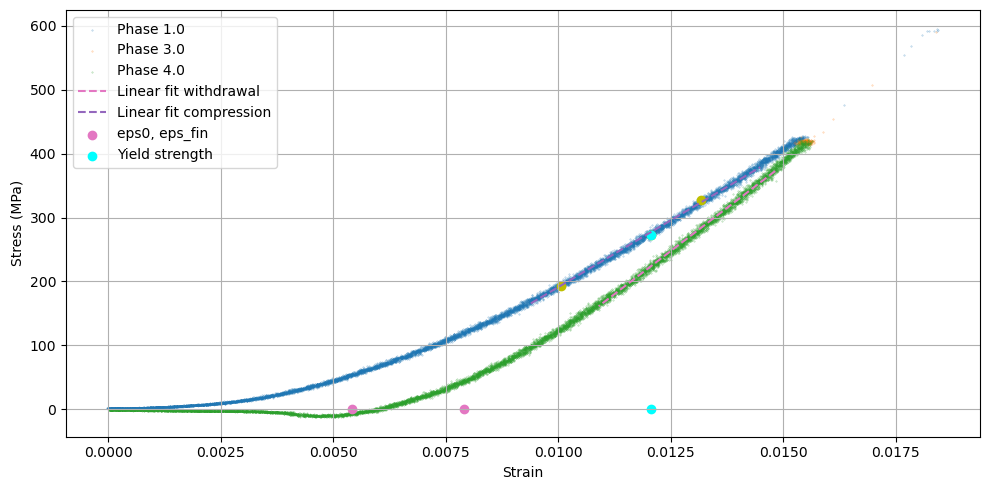

In [192]:
# Final Plotting
# colors = ['tab:blue', 'tab:orange', 'tab:green']

plt.figure()
for phase in data['Phase'].unique():
    cond = data['Phase'] == phase
#     plt.scatter(data.loc[cond, 'Strain'], data.loc[cond, 'StressRaw'], s=0.1, alpha=0.3, label=f'Stress raw {phase}')
    plt.scatter(data.loc[cond, 'Strain'], data.loc[cond, 'Stress'], s=0.1, alpha=0.5, label=f'Phase {phase}')
plt.plot(epsilon_wd, sigma_wd, "--", c='tab:pink', label='Linear fit withdrawal')
plt.plot(epsilon_ct, sigma_ct, "--", c='tab:purple', label='Linear fit compression')
plt.scatter([eps0, eps_fin], [0, 0], c='tab:pink', label='eps0, eps_fin')
plt.scatter(data.loc[flex_pts, 'Strain'], data.loc[flex_pts, 'Stress'], c='y')
plt.scatter([eps_y, eps_y], [sigma_y, 0], c='cyan', label='Yield strength')
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')
# plt.xlim([0.025, 0.035])
plt.legend()
plt.savefig(f'CT_C_{sample}_{pillar}.png')
plt.show()

In [193]:
# Sumup
print(f"Sample {sample}, pillar {pillar}:\n")
print(f"Young's module: withdrawal {round(E)} MPa, compression {round(E_ct)} MPa")
print(f"Max plastic deformation, eps_fin:\t {eps_fin}")
print(f"Max elastic deformation, eps_el:\t {eps_el}")
print(f'Yield strength:\t\t\t\t {eps_y}, {round(sigma_y)} MPa')
print(f'Total plastic deformation:\t\t {eps_pl}')

with open(f'CT_calculated_{sample}.csv', 'a', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')    # quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow([sample, pillar, E, E_ct, eps0, eps_fin, eps_el, eps_pl, eps_y, sigma_y])

Sample 0001O, pillar P4:

Young's module: withdrawal 53890 MPa, compression 41771 MPa
Max plastic deformation, eps_fin:	 0.00789990136362567
Max elastic deformation, eps_el:	 0.006648255525443576
Yield strength:				 0.012066600740351716, 273 MPa
Total plastic deformation:		 0.0024815561487175307


In [ ]:
##### Draw all sample displacement


scan_old=0
plt.figure(figsize=(20,25))
i=1
for scan in range(len(del_test_line)-1):#wanted_test:
    plt.subplot(len(del_test_line)//5,6,i)
    plt.title("Test "+str(scan))
    plt.plot(1000*SampleDisplacement[scan],0.001*ForceA[scan])
    if len(SampleDisplacement[scan])>0:
        plt.xlim(-10,np.array(1000*SampleDisplacement[scan]).max()+10)
        plt.ylim(-0.01,np.array(0.001*ForceA[scan]).max()+0.01)
    plt.xlabel('Displacement into sample (nm)')
    plt.ylabel('Force (mN)')
    #plt.axis('tight')
    i+=1
plt.tight_layout()
plt.savefig('Test_all.png')
plt.show()

In [ ]:
#Draw sample displacement

scan_number=0

scan=scan_number
fig = plt.figure(figsize=(5, 4),facecolor=None)
axes = plt.axes()
axes.set_xlim([0,round(np.array(1000*SampleDisplacement[scan]).max()+10,0)])
axes.set_ylim([round(np.array(0.001*ForceA[scan]).min()-0.01,2),round(np.array(0.001*ForceA[scan]).max()+0.01,2)])
#plt.title("Test "+str(scan))
#plt.xlim([0,round(np.array(1000*SampleDisplacement[scan]).max()+1,0)])
plt.plot(1000*SampleDisplacement[scan],0.001*ForceA[scan])
plt.title("Test "+str(scan))
plt.xlabel('Displacement into sample (nm)')
plt.ylabel('Force (mN)')
#plt.axis('tight')
#plt.tight_layout()
plt.savefig('Test_'+str(scan)+'.png')
plt.show()


In [ ]:
#PILLAR1 - SAMPLE 4

In [ ]:
#Test compression sample4 pillar1


Name='2024_02_insituSEM_Sample_4_ID11_pillar_1'
height=3 #microns
top_diameter=1 #microns
middle_diameter=1 #microns
base_diameter=1 #microns

plt.figure(figsize=(5, 4),facecolor=None)


Liste_selected_tests=[44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,67,68]

nbre_tests=len(Liste_selected_tests)



scan=Liste_selected_tests[nbre_tests-1]

axes = plt.axes()
axes.set_xlim([0,round(np.array(1000*SampleDisplacement[scan]).max()+10,0)])
axes.set_ylim([round(np.array(0.001*ForceA[scan]).min()-0.01,2),round(np.array(0.001*ForceA[scan]).max()+0.01,2)])
plt.title(Name)
plt.xlabel('Displacement into sample (nm)')
plt.ylabel('Force (mN)')
color1 = Color("mediumseagreen") #cornflowerblue")#Color("navy")
color2=Color("steelblue")
colors = list(color1.range_to(color2,nbre_tests))


#viridis = mpl.colormaps['viridis'].resampled(8)
#coloration=viridis(range(nbre_tests))


for i in range (nbre_tests):
    scan=Liste_selected_tests[i]
    plt.plot(1000*SampleDisplacement[scan],0.001*ForceA[scan],c=colors[i].hex,linewidth=1)

plt.savefig('LoadVSDispOntoSample_'+Name+'.png')
plt.show()





In [ ]:
plt.figure(figsize=(5, 4),facecolor=None)


scan=Liste_selected_tests[nbre_tests-1]

axes = plt.axes()
axes.set_xlim([0,round(np.array(1000*SampleDisplacement[scan]/(height*1000)).max()+0.01,2)])
axes.set_ylim([round(np.array(0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2)).min()-0.01,2),round(np.array(0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2)+0.1).max()+0.01,2)])
plt.title(Name)
plt.xlabel('Strain')
plt.ylabel('Stress (GPa)')
color1 = Color("mediumseagreen") #cornflowerblue")#Color("navy")
color2=Color("steelblue")
colors = list(color1.range_to(color2,nbre_tests))


#viridis = mpl.colormaps['viridis'].resampled(8)
#coloration=viridis(range(nbre_tests))


for i in range (nbre_tests):
    scan=Liste_selected_tests[i]
    plt.plot(1000*SampleDisplacement[scan]/(height*1000),0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2),c=colors[i].hex,linewidth=1)

plt.savefig('StressVSStrain_'+Name+'.png')
plt.show()

In [ ]:




plt.figure(figsize=(5, 4),facecolor=None)



#recalage par rapport à la surface du premier test
scan=Liste_selected_tests[0]
Surface_position_first_test=Displacement_raw[scan][0]-SampleDisplacement[scan][0]
PosX_first_test=Pos_X[scan][0]

#gestion des bornes des axes
scan=Liste_selected_tests[nbre_tests-1]
axes = plt.axes()
axes.set_xlim([0,round(np.array(1000*(Displacement[scan]-Surface_position_first_test)).max()+10,0)])
axes.set_ylim([round(np.array(0.001*ForceA[scan]).min()-0.01,2),round(np.array(0.001*ForceA[scan]).max()+0.01,2)])

#Nom des axes
plt.title(Name)
plt.xlabel('Displacement into sample (nm)')
plt.ylabel('Force (mN)')

#Gestion des couleurs
color1 = Color("mediumseagreen") #cornflowerblue")#Color("navy")
color2=Color("steelblue")
colors = list(color1.range_to(color2,nbre_tests))



#Tracer

for i in range (nbre_tests):
    scan=Liste_selected_tests[i]
    derive_X=derive_X=(Pos_X[scan][0]-PosX_first_test)
    plt.plot(1000*(Displacement[scan]-Surface_position_first_test+derive_X),0.001*ForceA[scan],c=colors[i].hex,linewidth=1)

plt.savefig('LoadVSDisp_'+Name+'.png')
plt.show()


In [ ]:
plt.figure(figsize=(5, 4),facecolor=None)


scan=Liste_selected_tests[nbre_tests-1]

axes = plt.axes()
axes.set_xlim([0,round(np.array(1000*(Displacement[scan]/(height*1000)-Surface_position_first_test/(height*1000))).max()+0.01,2)])
axes.set_ylim([round(np.array(0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2)).min()-0.01,2),round(np.array(0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2)).max()+0.01,2)])
plt.title(Name)
plt.xlabel('Strain')
plt.ylabel('Stress (GPa)')
color1 = Color("mediumseagreen") #cornflowerblue")#Color("navy")
color2=Color("steelblue")
colors = list(color1.range_to(color2,nbre_tests))


#viridis = mpl.colormaps['viridis'].resampled(8)
#coloration=viridis(range(nbre_tests))


for i in range (nbre_tests):
    scan=Liste_selected_tests[i]
    derive_X=derive_X=(Pos_X[scan][0]-PosX_first_test)
    plt.plot(1000*(Displacement[scan]/(height*1000)-Surface_position_first_test/(height*1000)+derive_X/(height*1000)),0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2),c=colors[i].hex,linewidth=1)

plt.savefig('StressVSStrain2_'+Name+'.png')
plt.show()


In [ ]:
#Draw all sample displacement


plt.figure(figsize=(9,19))

for i in range(nbre_tests):#wanted_test:
    scan=Liste_selected_tests[i]
    plt.subplot(nbre_tests//3,4,i+1)
    plt.title("Test "+str(scan))
    plt.plot(1000*SampleDisplacement[scan],0.001*ForceA[scan])
    if len(SampleDisplacement[scan])>0:
        plt.xlim(-10,np.array(1000*SampleDisplacement[scan]).max()+10)
        plt.ylim(-0.01,np.array(0.001*ForceA[scan]).max()+0.01)
    plt.xlabel('Sample displacement (nm)')
    plt.ylabel('Force (mN)')
    #plt.axis('tight')
    i+=1
plt.tight_layout()
plt.savefig('All_'+Name+'.png')
plt.show()

In [ ]:
#PILLAR2 - SAMPLE 1

In [ ]:
#Test compression sample4 pillar2


Name='2024_02_insituSEM_Sample_4_ID11_pillar_2'

plt.figure(figsize=(5, 4),facecolor=None)


Liste_selected_tests=[29,30,31,32,33,34,35,36,37,38,39,40,41,42]

nbre_tests=len(Liste_selected_tests)



scan=Liste_selected_tests[nbre_tests-1]
axes = plt.axes()
axes.set_xlim([0,round(np.array(1000*SampleDisplacement[scan]).max()+10,0)])
axes.set_ylim([round(np.array(0.001*ForceA[scan]).min()-0.01,2),round(np.array(0.001*ForceA[scan]).max()+0.01,2)])
plt.title(Name)
plt.xlabel('Displacement into sample (nm)')
plt.ylabel('Force (mN)')
color1 = Color("mediumseagreen") #cornflowerblue")#Color("navy")
color2=Color("steelblue")
colors = list(color1.range_to(color2,nbre_tests))


#viridis = mpl.colormaps['viridis'].resampled(8)
#coloration=viridis(range(nbre_tests))


for i in range (nbre_tests):
    scan=Liste_selected_tests[i]
    plt.plot(1000*SampleDisplacement[scan],0.001*ForceA[scan],c=colors[i].hex,linewidth=1)

plt.savefig('LoadVSDispOntoSample_'+Name+'.png')
plt.show()

In [ ]:
plt.figure(figsize=(5, 4),facecolor=None)


scan=Liste_selected_tests[nbre_tests-1]

axes = plt.axes()
axes.set_xlim([0,round(np.array(1000*SampleDisplacement[scan]/(height*1000)).max()+0.01,2)])
axes.set_ylim([round(np.array(0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2)).min()-0.01,2),round(np.array(0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2)+0.1).max()+0.01,2)])
plt.title(Name)
plt.xlabel('Strain')
plt.ylabel('Stress (GPa)')
color1 = Color("mediumseagreen") #cornflowerblue")#Color("navy")
color2=Color("steelblue")
colors = list(color1.range_to(color2,nbre_tests))


#viridis = mpl.colormaps['viridis'].resampled(8)
#coloration=viridis(range(nbre_tests))


for i in range (nbre_tests):
    scan=Liste_selected_tests[i]
    plt.plot(1000*SampleDisplacement[scan]/(height*1000),0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2),c=colors[i].hex,linewidth=1)

plt.savefig('StressVSStrain_'+Name+'.png')
plt.show()

In [ ]:




plt.figure(figsize=(5, 4),facecolor=None)


#recalage par rapport à la surface du premier test
scan=Liste_selected_tests[0]
Surface_position_first_test=Displacement_raw[scan][0]-SampleDisplacement[scan][0]
PosX_first_test=Pos_X[scan][0]

#gestion des bornes des axes
scan=Liste_selected_tests[nbre_tests-1]
axes = plt.axes()
axes.set_xlim([0,round(np.array(1000*(Displacement[scan]-Surface_position_first_test)).max()+10,0)])
axes.set_ylim([round(np.array(0.001*ForceA[scan]).min()-0.01,2),round(np.array(0.001*ForceA[scan]).max()+0.01,2)])

#Nom des axes
plt.title(Name)
plt.xlabel('Displacement into sample (nm)')
plt.ylabel('Force (mN)')

#Gestion des couleurs
color1 = Color("mediumseagreen") #cornflowerblue")#Color("navy")
color2=Color("steelblue")
colors = list(color1.range_to(color2,nbre_tests))



#Tracer

for i in range (nbre_tests):
    scan=Liste_selected_tests[i]
    derive_X=derive_X=(Pos_X[scan][0]-PosX_first_test)
    plt.plot(1000*(Displacement[scan]-Surface_position_first_test+derive_X),0.001*ForceA[scan],c=colors[i].hex,linewidth=1)

plt.savefig('LoadVSDisp_'+Name+'.png')
plt.show()


In [ ]:
plt.figure(figsize=(5, 4),facecolor=None)


scan=Liste_selected_tests[nbre_tests-1]

axes = plt.axes()
axes.set_xlim([0,round(np.array(1000*(Displacement[scan]/(height*1000)-Surface_position_first_test/(height*1000))).max()+0.01,2)])
axes.set_ylim([round(np.array(0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2)).min()-0.01,2),round(np.array(0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2)).max()+0.01,2)])
plt.title(Name)
plt.xlabel('Strain')
plt.ylabel('Stress (GPa)')
color1 = Color("mediumseagreen") #cornflowerblue")#Color("navy")
color2=Color("steelblue")
colors = list(color1.range_to(color2,nbre_tests))


#viridis = mpl.colormaps['viridis'].resampled(8)
#coloration=viridis(range(nbre_tests))


for i in range (nbre_tests):
    scan=Liste_selected_tests[i]
    derive_X=derive_X=(Pos_X[scan][0]-PosX_first_test)
    plt.plot(1000*(Displacement[scan]/(height*1000)-Surface_position_first_test/(height*1000)+derive_X/(height*1000)),0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2),c=colors[i].hex,linewidth=1)

plt.savefig('StressVSStrain2_'+Name+'.png')
plt.show()

In [ ]:
#Draw all sample displacement


plt.figure(figsize=(8,10))

for i in range(nbre_tests):#wanted_test:
    scan=Liste_selected_tests[i]
    plt.subplot(nbre_tests//3,4,i+1)
    plt.title("Test "+str(scan))
    plt.plot(1000*SampleDisplacement[scan],0.001*ForceA[scan])
    if len(SampleDisplacement[scan])>0:
        plt.xlim(-10,np.array(1000*SampleDisplacement[scan]).max()+10)
        plt.ylim(-0.01,np.array(0.001*ForceA[scan]).max()+0.01)
    plt.xlabel('Sample displacement (nm)')
    plt.ylabel('Force (mN)')
    #plt.axis('tight')
    i+=1
plt.tight_layout()
plt.savefig('All_'+Name+'.png')
plt.show()

In [ ]:
#PILLAR3 - SAMPLE 4

In [ ]:
#Test compression sample4 pillar3


Name='2024_02_insituSEM_Sample_4_ID11_pillar_3'

plt.figure(figsize=(5, 4),facecolor=None)


Liste_selected_tests=[18,19,20,21,22,23,24,25,26,27,28]

nbre_tests=len(Liste_selected_tests)



scan=Liste_selected_tests[nbre_tests-1]
axes = plt.axes()
axes.set_xlim([0,round(np.array(1000*SampleDisplacement[scan]).max()+10,0)])
axes.set_ylim([round(np.array(0.001*ForceA[scan]).min()-0.01,2),round(np.array(0.001*ForceA[scan]).max()+0.01,2)])
plt.title(Name)
plt.xlabel('Displacement into sample (nm)')
plt.ylabel('Force (mN)')
color1 = Color("mediumseagreen") #cornflowerblue")#Color("navy")
color2=Color("steelblue")
colors = list(color1.range_to(color2,nbre_tests))


#viridis = mpl.colormaps['viridis'].resampled(8)
#coloration=viridis(range(nbre_tests))


for i in range (nbre_tests):
    scan=Liste_selected_tests[i]
    plt.plot(1000*SampleDisplacement[scan],0.001*ForceA[scan],c=colors[i].hex,linewidth=1)

plt.savefig('LoadVSDispOntoSample_'+Name+'.png')
plt.show()

In [ ]:
plt.figure(figsize=(5, 4),facecolor=None)


scan=Liste_selected_tests[nbre_tests-1]

axes = plt.axes()
axes.set_xlim([0,round(np.array(1000*SampleDisplacement[scan]/(height*1000)).max()+0.01,2)])
axes.set_ylim([round(np.array(0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2)).min()-0.01,2),round(np.array(0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2)+0.1).max()+0.01,2)])
plt.title(Name)
plt.xlabel('Strain')
plt.ylabel('Stress (GPa)')
color1 = Color("mediumseagreen") #cornflowerblue")#Color("navy")
color2=Color("steelblue")
colors = list(color1.range_to(color2,nbre_tests))


#viridis = mpl.colormaps['viridis'].resampled(8)
#coloration=viridis(range(nbre_tests))


for i in range (nbre_tests):
    scan=Liste_selected_tests[i]
    plt.plot(1000*SampleDisplacement[scan]/(height*1000),0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2),c=colors[i].hex,linewidth=1)

plt.savefig('StressVSStrain_'+Name+'.png')
plt.show()

In [ ]:


plt.figure(figsize=(5, 4),facecolor=None)


#recalage par rapport à la surface du premier test
scan=Liste_selected_tests[0]
Surface_position_first_test=Displacement_raw[scan][0]-SampleDisplacement[scan][0]
PosX_first_test=Pos_X[scan][0]

#gestion des bornes des axes
scan=Liste_selected_tests[nbre_tests-1]
axes = plt.axes()
axes.set_xlim([0,round(np.array(1000*(Displacement[scan]-Surface_position_first_test)).max()+10,0)])
axes.set_ylim([round(np.array(0.001*ForceA[scan]).min()-0.01,2),round(np.array(0.001*ForceA[scan]).max()+0.01,2)])

#Nom des axes
plt.title(Name)
plt.xlabel('Displacement into sample (nm)')
plt.ylabel('Force (mN)')

#Gestion des couleurs
color1 = Color("mediumseagreen") #cornflowerblue")#Color("navy")
color2=Color("steelblue")
colors = list(color1.range_to(color2,nbre_tests))



#Tracer

for i in range (nbre_tests):
    scan=Liste_selected_tests[i]
    derive_X=derive_X=(Pos_X[scan][0]-PosX_first_test)
    plt.plot(1000*(Displacement[scan]-Surface_position_first_test+derive_X),0.001*ForceA[scan],c=colors[i].hex,linewidth=1)

plt.savefig('LoadVSDisp_'+Name+'.png')
plt.show()


In [ ]:
plt.figure(figsize=(5, 4),facecolor=None)


scan=Liste_selected_tests[nbre_tests-1]

axes = plt.axes()
axes.set_xlim([0,round(np.array(1000*(Displacement[scan]/(height*1000)-Surface_position_first_test/(height*1000))).max()+0.01,2)])
axes.set_ylim([round(np.array(0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2)).min()-0.01,2),round(np.array(0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2)).max()+0.01,2)])
plt.title(Name)
plt.xlabel('Strain')
plt.ylabel('Stress (GPa)')
color1 = Color("mediumseagreen") #cornflowerblue")#Color("navy")
color2=Color("steelblue")
colors = list(color1.range_to(color2,nbre_tests))


#viridis = mpl.colormaps['viridis'].resampled(8)
#coloration=viridis(range(nbre_tests))


for i in range (nbre_tests):
    scan=Liste_selected_tests[i]
    derive_X=derive_X=(Pos_X[scan][0]-PosX_first_test)
    plt.plot(1000*(Displacement[scan]/(height*1000)-Surface_position_first_test/(height*1000)+derive_X/(height*1000)),0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2),c=colors[i].hex,linewidth=1)

plt.savefig('StressVSStrain2_'+Name+'.png')
plt.show()

In [ ]:
#Draw all sample displacement


plt.figure(figsize=(9,8))

for i in range(nbre_tests):#wanted_test:
    scan=Liste_selected_tests[i]
    plt.subplot(nbre_tests//3,4,i+1)
    plt.title("Test "+str(scan))
    plt.plot(1000*SampleDisplacement[scan],0.001*ForceA[scan])
    if len(SampleDisplacement[scan])>0:
        plt.xlim(-10,np.array(1000*SampleDisplacement[scan]).max()+10)
        plt.ylim(-0.01,np.array(0.001*ForceA[scan]).max()+0.01)
    plt.xlabel('Sample displacement (nm)')
    plt.ylabel('Force (mN)')
    #plt.axis('tight')
    i+=1
plt.tight_layout()
plt.savefig('All_'+Name+'.png')
plt.show()

In [ ]:
#PILLAR4 SAMPLE4

In [ ]:
#Test compression sample4 pillar4


Name='2024_02_insituSEM_Sample_4_ID11_pillar_4'

plt.figure(figsize=(5, 4),facecolor=None)


Liste_selected_tests=[0,1,2,3,4,5,6]

nbre_tests=len(Liste_selected_tests)



scan=Liste_selected_tests[nbre_tests-1]
axes = plt.axes()
axes.set_xlim([0,round(np.array(1000*SampleDisplacement[scan]).max()+10,0)])
axes.set_ylim([round(np.array(0.001*ForceA[scan]).min()-0.01,2),round(np.array(0.001*ForceA[scan]).max()+0.01,2)])
plt.title(Name)
plt.xlabel('Displacement into sample (nm)')
plt.ylabel('Force (mN)')
color1 = Color("mediumseagreen") #cornflowerblue")#Color("navy")
color2=Color("steelblue")
colors = list(color1.range_to(color2,nbre_tests))


#viridis = mpl.colormaps['viridis'].resampled(8)
#coloration=viridis(range(nbre_tests))


for i in range (nbre_tests):
    scan=Liste_selected_tests[i]
    plt.plot(1000*SampleDisplacement[scan],0.001*ForceA[scan],c=colors[i].hex,linewidth=1)

plt.savefig('LoadVSDispOntoSample_'+Name+'.png')
plt.show()

In [ ]:
plt.figure(figsize=(5, 4),facecolor=None)


scan=Liste_selected_tests[nbre_tests-1]

axes = plt.axes()
axes.set_xlim([0,round(np.array(1000*SampleDisplacement[scan]/(height*1000)).max()+0.01,2)])
axes.set_ylim([round(np.array(0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2)).min()-0.01,2),round(np.array(0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2)+0.1).max()+0.01,2)])
plt.title(Name)
plt.xlabel('Strain')
plt.ylabel('Stress (GPa)')
color1 = Color("mediumseagreen") #cornflowerblue")#Color("navy")
color2=Color("steelblue")
colors = list(color1.range_to(color2,nbre_tests))


#viridis = mpl.colormaps['viridis'].resampled(8)
#coloration=viridis(range(nbre_tests))


for i in range (nbre_tests):
    scan=Liste_selected_tests[i]
    plt.plot(1000*SampleDisplacement[scan]/(height*1000),0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2),c=colors[i].hex,linewidth=1)

plt.savefig('StressVSStrain_'+Name+'.png')
plt.show()

In [ ]:


plt.figure(figsize=(5, 4),facecolor=None)


#recalage par rapport à la surface du premier test
scan=Liste_selected_tests[0]
Surface_position_first_test=Displacement_raw[scan][0]-SampleDisplacement[scan][0]
PosX_first_test=Pos_X[scan][0]

#gestion des bornes des axes
scan=Liste_selected_tests[nbre_tests-1]
axes = plt.axes()
axes.set_xlim([0,round(np.array(1000*(Displacement[scan]-Surface_position_first_test)).max()+10,0)])
axes.set_ylim([round(np.array(0.001*ForceA[scan]).min()-0.01,2),round(np.array(0.001*ForceA[scan]).max()+0.01,2)])

#Nom des axes
plt.title(Name)
plt.xlabel('Displacement into sample (nm)')
plt.ylabel('Force (mN)')

#Gestion des couleurs
color1 = Color("mediumseagreen") #cornflowerblue")#Color("navy")
color2=Color("steelblue")
colors = list(color1.range_to(color2,nbre_tests))



#Tracer

for i in range (nbre_tests):
    scan=Liste_selected_tests[i]
    derive_X=derive_X=(Pos_X[scan][0]-PosX_first_test)
    plt.plot(1000*(Displacement[scan]-Surface_position_first_test+derive_X),0.001*ForceA[scan],c=colors[i].hex,linewidth=1)

plt.savefig('LoadVSDisp_'+Name+'.png')
plt.show()

In [ ]:
plt.figure(figsize=(5, 4),facecolor=None)


scan=Liste_selected_tests[nbre_tests-1]

axes = plt.axes()
axes.set_xlim([0,round(np.array(1000*(Displacement[scan]/(height*1000)-Surface_position_first_test/(height*1000))).max()+0.01,2)])
axes.set_ylim([round(np.array(0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2)).min()-0.01,2),round(np.array(0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2)).max()+0.01,2)])
plt.title(Name)
plt.xlabel('Strain')
plt.ylabel('Stress (GPa)')
color1 = Color("mediumseagreen") #cornflowerblue")#Color("navy")
color2=Color("steelblue")
colors = list(color1.range_to(color2,nbre_tests))


#viridis = mpl.colormaps['viridis'].resampled(8)
#coloration=viridis(range(nbre_tests))


for i in range (nbre_tests):
    scan=Liste_selected_tests[i]
    derive_X=derive_X=(Pos_X[scan][0]-PosX_first_test)
    plt.plot(1000*(Displacement[scan]/(height*1000)-Surface_position_first_test/(height*1000)+derive_X/(height*1000)),0.001*ForceA[scan]/(np.pi*(middle_diameter/2)**2),c=colors[i].hex,linewidth=1)

plt.savefig('StressVSStrain2_'+Name+'.png')
plt.show()

In [ ]:
#Draw all sample displacement


plt.figure(figsize=(9,8))

for i in range(nbre_tests):#wanted_test:
    scan=Liste_selected_tests[i]
    plt.subplot(nbre_tests//2,3,i+1)
    plt.title("Test "+str(scan))
    plt.plot(1000*SampleDisplacement[scan],0.001*ForceA[scan])
    if len(SampleDisplacement[scan])>0:
        plt.xlim(-10,np.array(1000*SampleDisplacement[scan]).max()+10)
        plt.ylim(-0.01,np.array(0.001*ForceA[scan]).max()+0.01)
    plt.xlabel('Sample displacement (nm)')
    plt.ylabel('Force (mN)')
    #plt.axis('tight')
    i+=1
plt.tight_layout()
plt.savefig('All_'+Name+'.png')
plt.show()

In [ ]:
#TEST!


def on_click(event):
    pressed = ax.button_pressed
    ax.button_pressed = -1 # some value that doesn't make sense.
    coords = ax.format_coord(event.xdata, event.ydata) # coordinates string in the form x=value, y=value, z= value
    ax.button_pressed = pressed
    return coords

In [ ]:
#Recalage surface
scan_number=0

scan=scan_number
fig = plt.figure(figsize=(5, 4),facecolor=None)
axes = plt.axes()
axes.set_xlim([0,round(np.array(1000*SampleDisplacement[scan]).max()+10,0)])
axes.set_ylim([round(np.array(0.001*ForceA[scan]).min()-0.01,2),round(np.array(0.001*ForceA[scan]).max()+0.01,2)])
plt.title("Test "+str(scan))
plt.xlabel('Displacement into sample (nm)')
plt.ylabel('Force (mN)')
plt.plot(1000*SampleDisplacement[scan],0.001*ForceA[scan],picker=3)

#display(fig, output)

def on_click():
        pressed = ax.button_pressed
        ax.button_pressed = -1 # some value that doesn't make sense.
        coords = ax.format_coord(event.xdata, event.ydata) # coordinates string in the form x=value, y=value, z= value
        ax.button_pressed = pressed
        print(coords)

cid=fig.canvas.mpl_connect('button_press_event', on_click)


plt.show()







In [ ]:
on_click()

In [ ]:
from IPython.display import display
button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)
v=0

def on_button_clicked(b):
    with output:
        print("Button clicked.")
        return 3

button.on_click(on_button_clicked)


In [ ]:
on_button_clicked(b)

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()


x = np.linspace(0, 2*np.pi, 100)
y = np.sin(3*x)
ax.plot(x, y)



In [ ]:
scan_old=0
plt.figure(figsize=(15,10),layout='tight')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
i,ii_lab=0,0
for scan in (wanted_test):
    if  ForceA[scan].max()<2:
        continue
    #cut_disp=Displacement[scan][np.where((ForceA[scan]<10) & (ForceA[scan]>8))[0][0]]
    
    cut_disp=0.85*Displacement[scan].max()
    if Displacement[scan].max()>1:
        cut_disp=0.5
        
    plt.subplot(4,4,i+1)
    plt.plot(Displacement[scan],ForceA[scan],".",label='raw')
    plt.plot(Displacement_cal[scan],ForceA[scan],".",label='calibrated')

        
    a=ForceA[scan]
    b=np.array(ForceA[scan])
    b[0:-1]=a[1:]
    diff=a-b
    diff[np.where(np.abs(a-b)<2)]=0
    minnn=Displacement[scan][np.where(np.abs(a-b)>1.5)].min()-0.02
    plt.xlim(minnn,Displacement[scan].max()+0.05)
    plt.ylim(0,ForceA[scan].max()+5)
    plt.xlabel('Disp (µm)')
    plt.ylabel('Force (µN)')
    plt.grid(alpha=0.1)
    plt.title("Test "+str(scan-1)+" "+wanted_test_part[ii_lab] )
    #plt.axis('tight')
    if scan not in ( 60, 61, 62,63):
        plt.legend()
        i+=1
    else:
        plt.title("Test "+str(np.array(( 60, 61, 62, 63))-1)+" "+wanted_test_part[ii_lab] )
        
        
    ii_lab+=1
#plt.tight_layout()
plt.savefig('Test_sel_real.png')
plt.show()

In [ ]:
scan

In [ ]:
pwd

In [ ]:
 scan